### Business objective: Our objective is to build a model that can predict the Loss Given Default (LGD) for defaulted accounts

##### LGD= {Loan Amount-(Collateral Amount+Total sum of all pre-payments)}/Loan Amount
Where:
- Loan Amount: The total amount of the loan or credit exposure.
- Collateral Amount: The value of collateral or security provided against the loan.
- Sum of total prepayments: The total amount of prepayments made on the loan before default.


# Data Preprocessing and Feature Engineering:

In [1]:
#Loading the dataset
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the directory containing the datasets
data_directory = r'C:\Users\sanka\Downloads\EPGDM - Data Science\Credit risk assignment'

# Load main_loan_base.csv
main_loan_base_path = os.path.join(data_directory, 'main_loan_base.csv')
main_loan_base = pd.read_csv(main_loan_base_path)

# Load repayment_base.csv
repayment_base_path = os.path.join(data_directory, 'repayment_base.csv')
repayment_base = pd.read_csv(repayment_base_path)

# Load monthly_balance_base.csv
monthly_balance_base_path = os.path.join(data_directory, 'monthly_balance_base.csv')
monthly_balance_base = pd.read_csv(monthly_balance_base_path)



### Understanding the bank loan dataset (main_loan_base)

In [2]:
main_loan_base.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN79307711,Aarna Sura,"09/506, Anand Path, Ongole 646592",Consumer-Durable,21916,4929.47,3,0,3,127,2,10.1,1012.32,2019-04-14,2020-07-31
1,LN88987787,Amira Konda,"11, Dhaliwal Circle\nRaichur 659460",Two-Wheeler,121184,10254.50,1,0,0,156,2,11.8,5693.24,2015-04-14,2016-07-30
2,LN78096023,Eshani Khosla,H.No. 31\nAtwal Street\nKatihar-037896,Car,487036,116183.86,0,1,10,22,3,14.6,16788.02,2015-01-10,2015-04-18
3,LN56862431,Divij Kala,"766, Gulati Marg\nPudukkottai-051396",Two-Wheeler,52125,10310.05,5,2,9,30,2,9.6,2395.69,2018-02-07,2018-09-13
4,LN77262680,Vaibhav Bir,"55/73, Sachdev Marg\nDharmavaram-332966",Consumer-Durable,8635,1051.25,0,1,3,62,2,9.6,396.87,2014-12-25,2016-02-20


In [3]:
main_loan_base.shape

(50000, 15)

In [4]:
#Basic statistics and information about the main loan base dataset
print("\nSummary statistics for main_loan_base:")
print(main_loan_base.describe())


Summary statistics for main_loan_base:
        loan_amount  collateral_value  cheque_bounces  number_of_loans  \
count  5.000000e+04      50000.000000    50000.000000     50000.000000   
mean   3.816870e+05      57189.733515        1.764740         1.509540   
std    5.037605e+05      93407.376232        1.760175         1.259389   
min    2.000000e+03          0.070000        0.000000         0.000000   
25%    2.393550e+04       3329.392500        0.000000         0.000000   
50%    1.926885e+05      19863.105000        1.000000         1.000000   
75%    4.334075e+05      62313.440000        3.000000         2.000000   
max    1.999992e+06     592545.710000       11.000000         6.000000   

       missed_repayments  vintage_in_months  tenure_years      interest  \
count       50000.000000        50000.00000  50000.000000  50000.000000   
mean            9.808280           80.01584      2.994620     11.484584   
std             7.788007           44.14149      1.415539      2.019

In [5]:
# Check for missing values
print("\nMissing values in main_loan_base:")
print(main_loan_base.isnull().sum())


Missing values in main_loan_base:
loan_acc_num         0
customer_name        0
customer_address     0
loan_type            0
loan_amount          0
collateral_value     0
cheque_bounces       0
number_of_loans      0
missed_repayments    0
vintage_in_months    0
tenure_years         0
interest             0
monthly_emi          0
disbursal_date       0
default_date         0
dtype: int64


In [6]:
main_loan_base.dtypes

loan_acc_num          object
customer_name         object
customer_address      object
loan_type             object
loan_amount            int64
collateral_value     float64
cheque_bounces         int64
number_of_loans        int64
missed_repayments      int64
vintage_in_months      int64
tenure_years           int64
interest             float64
monthly_emi          float64
disbursal_date        object
default_date          object
dtype: object

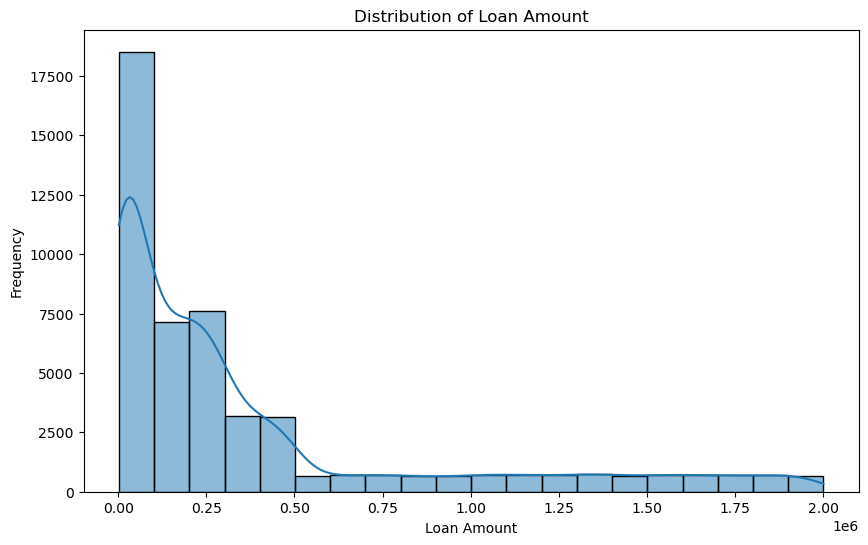

In [7]:
# Perform exploratory data analysis (EDA) using Seaborn
# Create a histogram to visualize the distribution of loan amount
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=main_loan_base, x='loan_amount', bins=20, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


### Understanding the repayment dataset (repayment_base)

In [8]:
repayment_base.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN79307711,1012.320000,2019-05-18
1,LN79307711,667.987539,2019-06-20
2,LN79307711,1012.320000,2019-07-16
3,LN79307711,1012.320000,2019-08-16
4,LN79307711,1012.320000,2019-09-22


In [9]:
repayment_base.shape

(626601, 3)

In [10]:
repayment_base.describe()

,repayment_amount
count,626601.000000
mean,12080.113187
std,19862.034048
min,0.003761
25%,742.820000
50%,4893.860000
75%,13031.560000
max,179521.680000


In [11]:
#Checking for missing values in the repayment base dataset
repayment_base.isnull().sum()

loan_acc_num        0
repayment_amount    0
repayment_date      0
dtype: int64

### Understanding the monthly balance dataset (monthly_balance_base)

In [12]:
monthly_balance_base.head()

,loan_acc_num,date,balance_amount
0,LN79307711,2010-03-26,407.343213
1,LN79307711,2010-04-25,545.431227
2,LN79307711,2010-05-25,861.932145
3,LN79307711,2010-06-24,562.082133
4,LN79307711,2010-07-24,37.768861


In [13]:
#Description of the dataset
monthly_balance_base.describe()

,balance_amount
count,4.002490e+06
mean,9.162366e+03
std,1.931855e+04
min,-7.035974e+04
25%,4.873859e+02
50%,2.560146e+03
75%,8.791180e+03
max,4.472208e+05


In [14]:
#Understanding the shape of the monthly balance dataset
monthly_balance_base.shape

(4002490, 3)

In [15]:
#Checking for the missing values
monthly_balance_base.isnull().sum()

loan_acc_num      0
date              0
balance_amount    0
dtype: int64

There are no missing values in these datasets.

# Target Variable Calculation:

To calculate the target variable, Loss Given Default (LGD), we'll follow the formula provided earlier:

**LGD= {Loan Amount−(Collateral Amount+Sum of total prepayments)}/Loan Amount**

We'll need to calculate this value for each loan account in the dataset.


Lets calculate two things:
Total amount of prepayment done for a particular loan account

In [16]:
# Calculate total prepayments for each loan account from repayment_base
total_prepayments_df = repayment_base.groupby('loan_acc_num')['repayment_amount'].sum().reset_index()
total_prepayments_df.rename(columns={'repayment_amount': 'total_prepayments'}, inplace=True)

In [17]:
total_prepayments_df.head()

,loan_acc_num,total_prepayments
0,LN10000701,40020.990845
1,LN10001077,112218.467834
2,LN10004116,290634.935049
3,LN10007976,337321.715542
4,LN10010204,61290.488288


In [18]:
total_prepayments_df.shape

(46008, 2)

In [19]:
# Calculate average monthly balance for each account from monthly_balance_base
average_balance_df = monthly_balance_base.groupby('loan_acc_num')['balance_amount'].mean().reset_index()
average_balance_df.rename(columns={'balance_amount': 'average_monthly_balance'}, inplace=True)

In [20]:
average_balance_df.head()

,loan_acc_num,average_monthly_balance
0,LN10000701,2301.879193
1,LN10001077,2296.279543
2,LN10004116,8887.380832
3,LN10007976,9420.561560
4,LN10010204,6446.205233


In [21]:
average_balance_df.shape

(49671, 2)

In [22]:
merged_data = pd.merge(total_prepayments_df, average_balance_df, on='loan_acc_num', how='left')

In [23]:
merged_data.shape

(46008, 3)

In [24]:
merged_data.head()

,loan_acc_num,total_prepayments,average_monthly_balance
0,LN10000701,40020.990845,2301.879193
1,LN10001077,112218.467834,2296.279543
2,LN10004116,290634.935049,8887.380832
3,LN10007976,337321.715542,9420.561560
4,LN10010204,61290.488288,6446.205233


In [25]:
merged_data.isnull().sum()

loan_acc_num                 0
total_prepayments            0
average_monthly_balance    292
dtype: int64

We will merge the above dataset into the main loan dataset and then use the rows to calculate Loss Given Default.

In [26]:
main_loan_base.shape

(50000, 15)

In [27]:
#We will create a seperate dataframe 'creditdata' that will include communon columns from merged dataframe and main_loan_base.
#This dataset will be used to build the model.
creditdata =pd.merge(merged_data, main_loan_base, on='loan_acc_num', how='left')

In [28]:
creditdata.columns

Index(['loan_acc_num', 'total_prepayments', 'average_monthly_balance',
       'customer_name', 'customer_address', 'loan_type', 'loan_amount',
       'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date'],
      dtype='object')

In [29]:
creditdata.isnull().sum()

loan_acc_num                 0
total_prepayments            0
average_monthly_balance    292
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
dtype: int64

In [30]:
#There are 292 instances where the average_monthly_balance is NA. We will impute the same same with the mean.

In [31]:
mean_balance = creditdata['average_monthly_balance'].mean()

In [32]:
creditdata['average_monthly_balance'].fillna(mean_balance, inplace=True)

In [33]:
# Check for missing values after imputation
print("Missing values after imputation:")
print(creditdata.isnull().sum())

Missing values after imputation:
loan_acc_num               0
total_prepayments          0
average_monthly_balance    0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
dtype: int64


In [34]:
#Convert date columns to datetime
creditdata['disbursal_date'] = pd.to_datetime(creditdata['disbursal_date'])
creditdata['default_date'] = pd.to_datetime(creditdata['default_date'])


In [35]:
creditdata.dtypes

loan_acc_num                       object
total_prepayments                 float64
average_monthly_balance           float64
customer_name                      object
customer_address                   object
loan_type                          object
loan_amount                         int64
collateral_value                  float64
cheque_bounces                      int64
number_of_loans                     int64
missed_repayments                   int64
vintage_in_months                   int64
tenure_years                        int64
interest                          float64
monthly_emi                       float64
disbursal_date             datetime64[ns]
default_date               datetime64[ns]
dtype: object

In [36]:
creditdata.shape

(46023, 17)

### Calulating the Loss Given Default (LGD) and adding it in form of an additional column. This will be our target Variable

In [37]:
#Calculating Loss Given Default (LGD)
creditdata['LGD'] = (creditdata['loan_amount'] - (creditdata['collateral_value'] + creditdata['total_prepayments'])) / creditdata['loan_amount']

In [38]:
creditdata.head()

,loan_acc_num,total_prepayments,average_monthly_balance,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,LGD
0,LN10000701,40020.990845,2301.879193,Indrans Kashyap,"095\nBedi Chowk, Bulandshahr-053351",Two-Wheeler,207611,18286.48,0,3,16,20,3,10.4,6738.08,2014-03-06,2015-08-15,0.719150
1,LN10001077,112218.467834,2296.279543,Tushar Rama,"15/772\nMahajan Ganj, Amravati-455724",Two-Wheeler,260725,27239.60,0,3,17,109,5,14.6,6148.02,2019-04-25,2023-06-29,0.465114
2,LN10004116,290634.935049,8887.380832,Jivika Varughese,52/825\nBhakta Chowk\nNavi Mumbai 548622,Personal,395427,34859.98,0,1,3,138,5,8.2,8055.74,2013-08-03,2013-12-15,0.176852
3,LN10007976,337321.715542,9420.561560,Tejas Rajan,08/34\nUpadhyay Chowk\nHyderabad-811626,Car,499003,23118.25,1,1,8,80,3,9.5,15984.54,2012-10-18,2015-02-05,0.277680
4,LN10010204,61290.488288,6446.205233,Umang Mani,62\nBhatt Road\nVisakhapatnam-295551,Two-Wheeler,150565,10672.20,2,3,4,15,1,8.5,13132.25,2021-12-25,2022-05-10,0.522049


In [39]:
#Checking for null values
creditdata.isnull().sum()

loan_acc_num               0
total_prepayments          0
average_monthly_balance    0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
LGD                        0
dtype: int64

In [40]:
creditdata.dtypes

loan_acc_num                       object
total_prepayments                 float64
average_monthly_balance           float64
customer_name                      object
customer_address                   object
loan_type                          object
loan_amount                         int64
collateral_value                  float64
cheque_bounces                      int64
number_of_loans                     int64
missed_repayments                   int64
vintage_in_months                   int64
tenure_years                        int64
interest                          float64
monthly_emi                       float64
disbursal_date             datetime64[ns]
default_date               datetime64[ns]
LGD                               float64
dtype: object

# Model Development:

### Checking the relationship of the variables with the Target Variable LGD

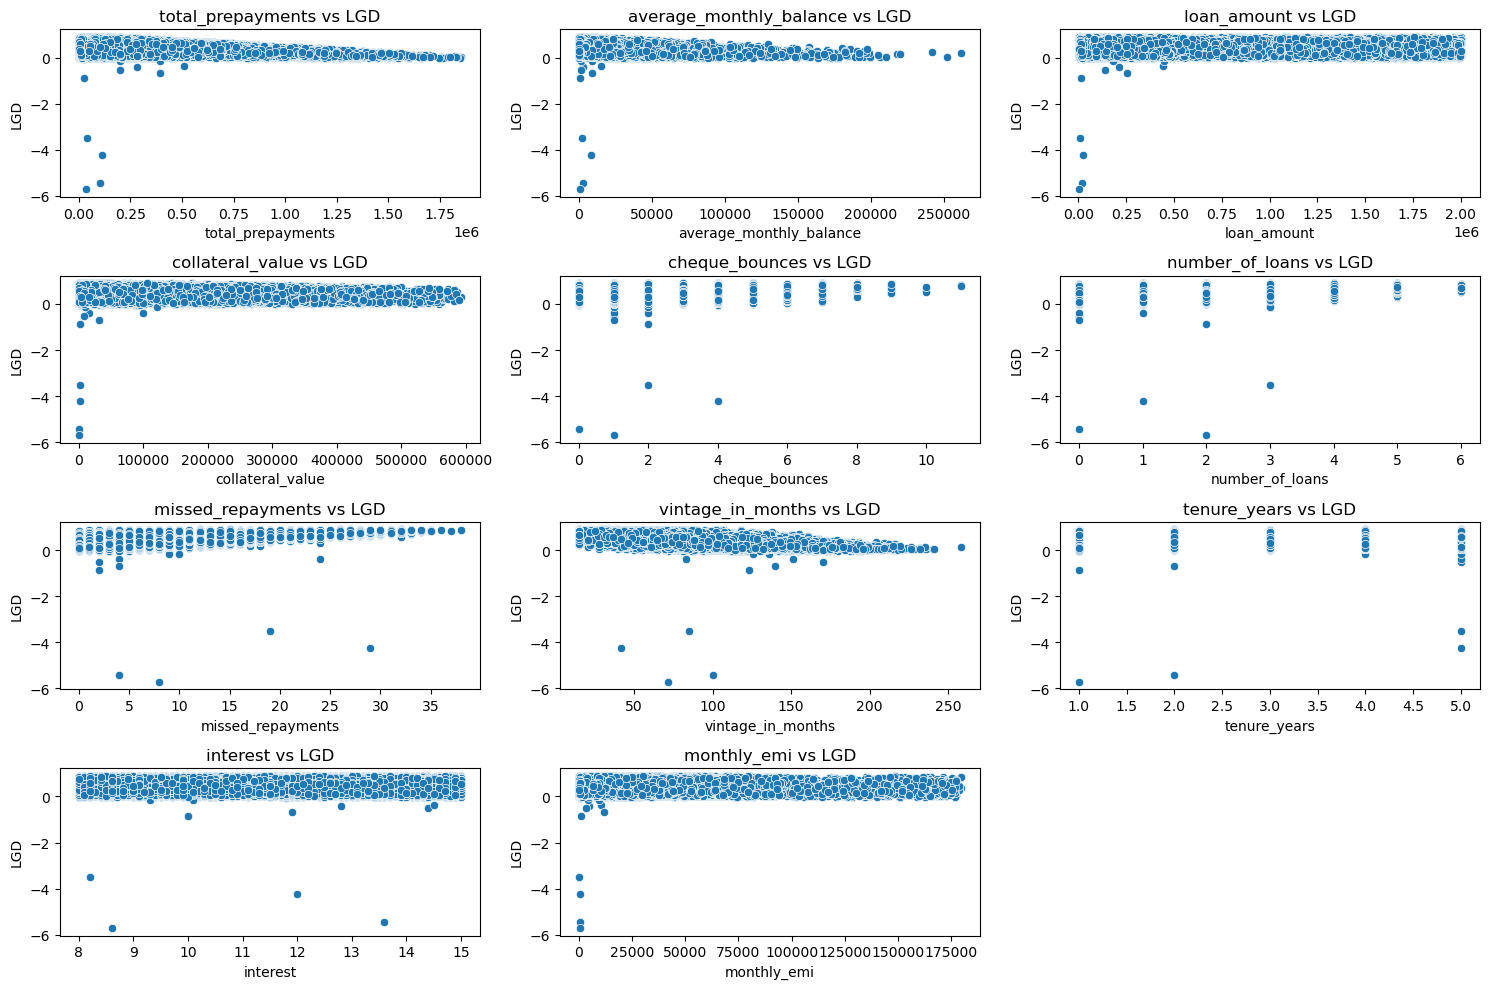

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical features
numerical_features = ['total_prepayments', 'average_monthly_balance', 'loan_amount', 'collateral_value', 
                      'cheque_bounces', 'number_of_loans', 'missed_repayments', 'vintage_in_months', 
                      'tenure_years', 'interest', 'monthly_emi']



# Plot numerical features against LGD
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(data=creditdata, x=feature, y='LGD')
    plt.title(f'{feature} vs LGD')

plt.tight_layout()
plt.show()




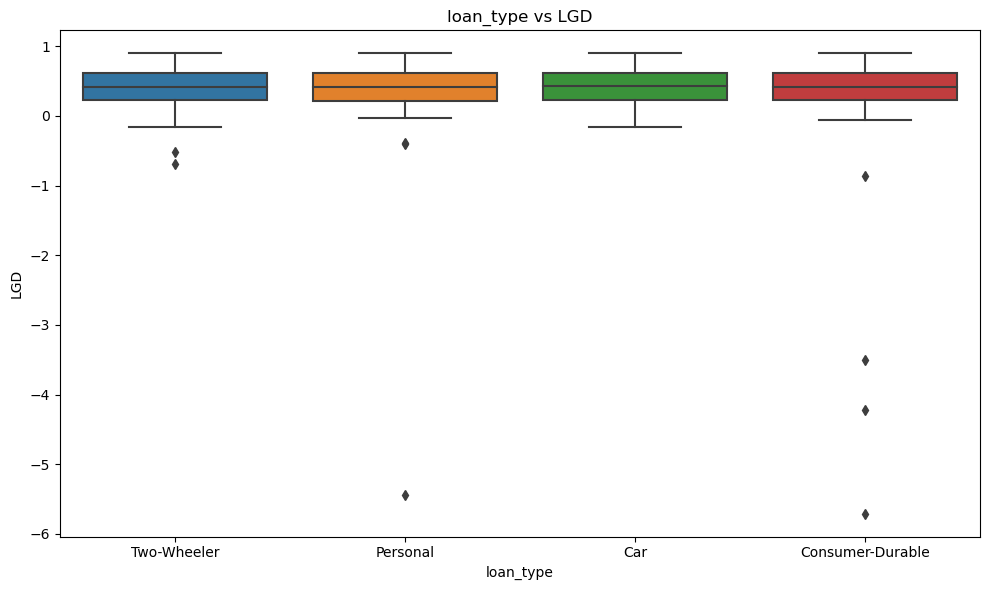

In [42]:
# Categorical features
categorical_features = ['loan_type']

# Plot categorical features against LGD
plt.figure(figsize=(10, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 1, i)
    sns.boxplot(data=creditdata, x=feature, y='LGD')
    plt.title(f'{feature} vs LGD')

plt.tight_layout()
plt.show()

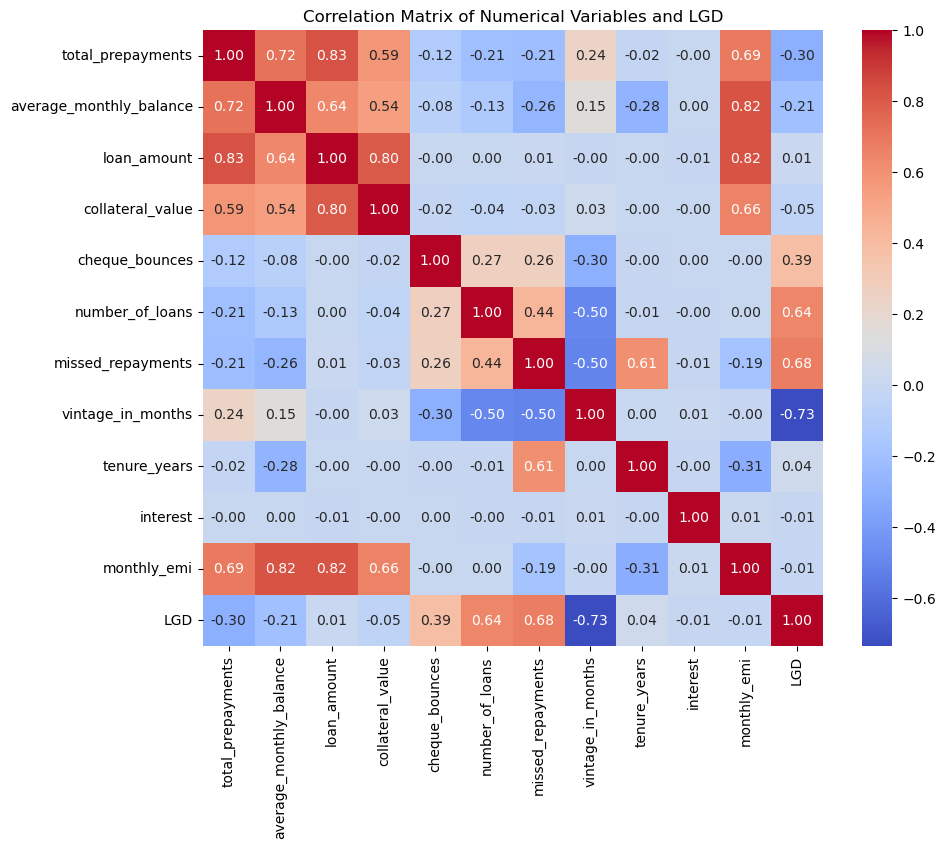

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features and target variable LGD
numerical_features = ['total_prepayments', 'average_monthly_balance', 'loan_amount', 'collateral_value', 
                      'cheque_bounces', 'number_of_loans', 'missed_repayments', 'vintage_in_months', 
                      'tenure_years', 'interest', 'monthly_emi', 'LGD']

# Create a correlation matrix
correlation_matrix = creditdata[numerical_features].corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables and LGD')
plt.show()


We can see that total_prepayments, average_monthly_balance, loan_ammount, collateral_value are highly correlated. And rightly so because all of these are dependent in estimating the LGD and these values will increase with the increase of the loan amount.
So we will begin with creating a simple linear regression model to estimate LGD and and would like to keep variables which are the best predictors of LGD


In [44]:
creditdata.columns

Index(['loan_acc_num', 'total_prepayments', 'average_monthly_balance',
       'customer_name', 'customer_address', 'loan_type', 'loan_amount',
       'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'LGD'],
      dtype='object')

In [45]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [46]:
# Step 1: Data Preprocessing
X = creditdata.drop(['LGD', 'loan_acc_num', 'customer_name', 'customer_address', 'loan_type', 'disbursal_date', 'default_date'], axis=1)  # Features
y = creditdata['LGD']  # Target variable

In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.head()

,total_prepayments,average_monthly_balance,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi
40516,47533.720000,6299.685393,266795,55704.98,2,2,5,21,1,12.5,23766.86
14631,190337.931028,2277.087877,442678,103506.98,0,0,15,15,5,10.1,9427.40
9724,101047.020000,11011.887472,191560,28549.28,2,1,1,113,1,10.0,16841.17
32517,395225.013340,27232.594378,529883,84495.40,0,1,1,110,2,15.0,25692.25
15727,65298.652388,7114.529267,181605,26686.57,3,3,4,85,1,11.6,16101.42


In [49]:
y_train.head()

40516    0.613041
14631    0.336211
9724     0.323469
32517    0.094667
15727    0.493487
Name: LGD, dtype: float64

In [50]:
#Without any scaling
# Step 3: Feature Selection using RFE
estimator = LinearRegression()  # Choose the estimator (model)
rfe = RFE(estimator, n_features_to_select=5)  # Select the number of features
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

Selected Features and their Rankings:
                    Feature  Selected  Ranking
0         total_prepayments     False        5
1   average_monthly_balance     False        3
2               loan_amount     False        7
3          collateral_value     False        6
4            cheque_bounces      True        1
5           number_of_loans      True        1
6         missed_repayments      True        1
7         vintage_in_months      True        1
8              tenure_years      True        1
9                  interest     False        2
10              monthly_emi     False        4


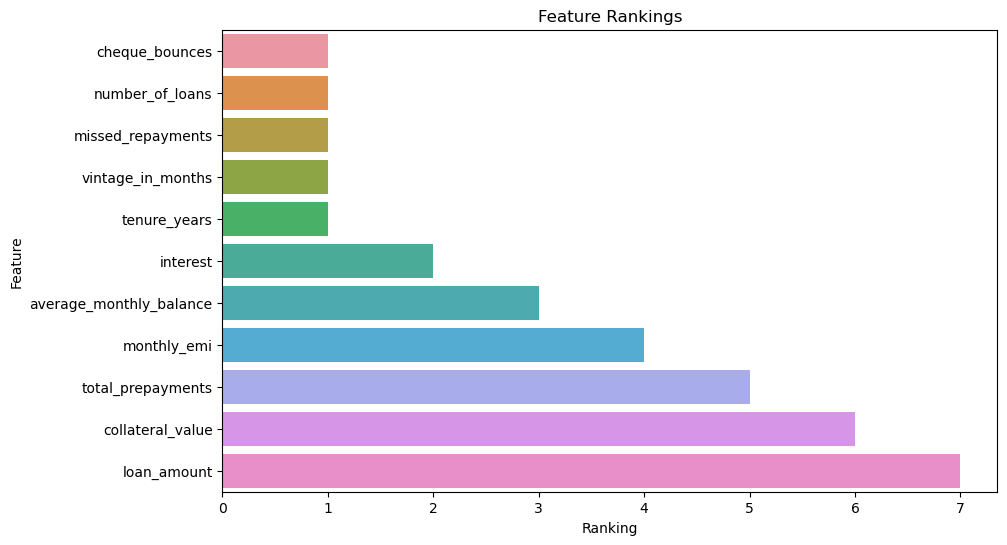

In [51]:
# Get selected features and their rankings
selected_features = X.columns[rfe.support_]
feature_rankings = rfe.ranking_

# Create a DataFrame to display selected features and their rankings
feature_ranking_df = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_, 'Ranking': rfe.ranking_})

# Print selected features and their rankings
print("Selected Features and their Rankings:")
print(feature_ranking_df)

# Plot feature rankings
plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=feature_ranking_df.sort_values(by='Ranking'))
plt.title('Feature Rankings')
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.show()

In [52]:
# Step 4: Model Building
model = LinearRegression()  # Choose the model
model.fit(X_train_rfe, y_train)

LinearRegression()

Coefficients of Selected Features:
             Feature  Coefficient
0     cheque_bounces     0.010771
1    number_of_loans     0.038691
2  missed_repayments     0.020196
3  vintage_in_months    -0.001623
4       tenure_years    -0.056593


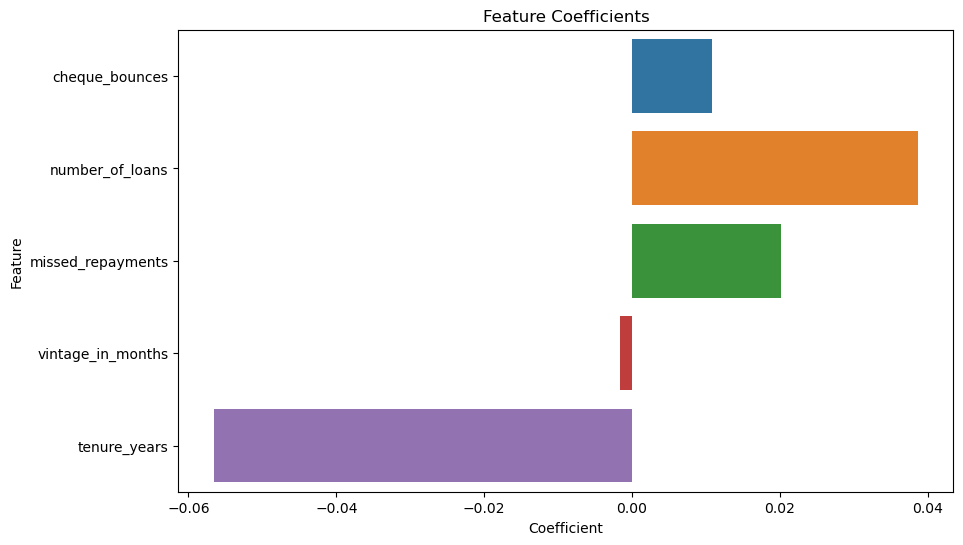

In [53]:
# Get coefficients of selected features
feature_coefficients = model.coef_

# Create a DataFrame to display coefficients of selected features
coef_df = pd.DataFrame({'Feature': selected_features, 'Coefficient': feature_coefficients})

# Print coefficients
print("Coefficients of Selected Features:")
print(coef_df)

# Plot coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Coefficients')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [77]:
# Get intercept term
intercept_term = model.intercept_

# Print intercept term
print("Intercept Term:", intercept_term)


Intercept Term: 0.4723116871742039


In [54]:
# Step 5: Model Evaluation
y_pred = model.predict(X_test_rfe)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.00957914059945507


The MSE value of approximately 0.0095 suggests that, on average, the squared difference between the actual and predicted values of LGD is approximately 0.0095. This implies that the model's predictions are relatively close to the actual values, indicating good performance.

cheque_bounces     0.010771
number_of_loans     0.038691
missed_repayments     0.020196
vintage_in_months    -0.001623
tenure_years    -0.056593

Intercept Term: 0.4723116871742039



In [79]:
# Coefficients of selected features
coefficients = [0.010771, 0.038691, 0.020196, -0.001623, -0.056593]
features = ['cheque_bounces', 'number_of_loans', 'missed_repayments', 'vintage_in_months', 'tenure_years']

# Intercept term
intercept_term = 0.4723116871742039

# Constructing the equation
equation = "LGD = "
for i, (feature, coefficient) in enumerate(zip(features, coefficients)):
    if i != 0:
        equation += " + "
    equation += f"{coefficient:.4f} * {feature}"

# Add intercept term to the equation
equation += f" + {intercept_term:.4f}"

# Print equation
print("Equation of the Linear Regression model:")
print(equation)


Equation of the Linear Regression model:
LGD = 0.0108 * cheque_bounces + 0.0387 * number_of_loans + 0.0202 * missed_repayments + -0.0016 * vintage_in_months + -0.0566 * tenure_years + 0.4723


# Model Evaluation: 

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# Make predictions on the testing data
y_pred = model.predict(X_test_rfe)

In [57]:
# Compute R-squared (R2) score
r2 = r2_score(y_test, y_pred)

In [58]:
# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

In [59]:
# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

In [60]:
# Compute Adjusted R-squared (Adjusted R2) score
n = len(X_train_rfe)
k = X_train_rfe.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Print performance metrics
print("Performance Metrics:")
print("R-squared (R2) Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared (Adjusted R2) Score:", adjusted_r2)

Performance Metrics:
R-squared (R2) Score: 0.8226472235296126
Mean Squared Error (MSE): 0.00957914059945507
Root Mean Squared Error (RMSE): 0.097873084141939
Adjusted R-squared (Adjusted R2) Score: 0.8226231345400887


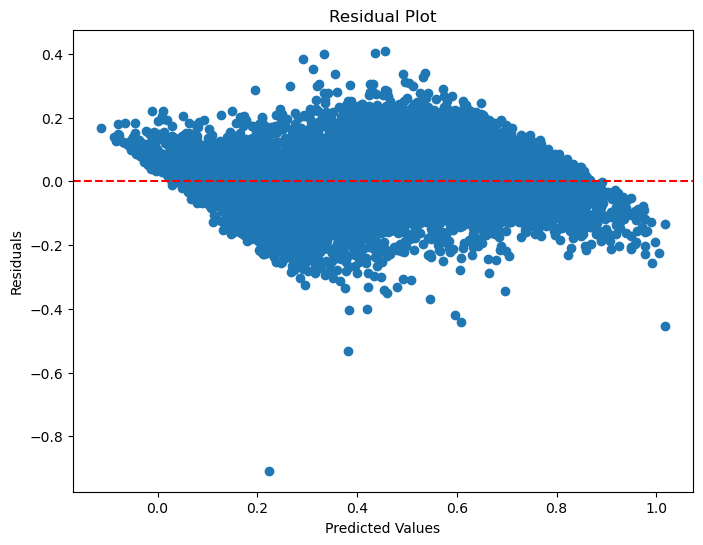

In [61]:
# Plot residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

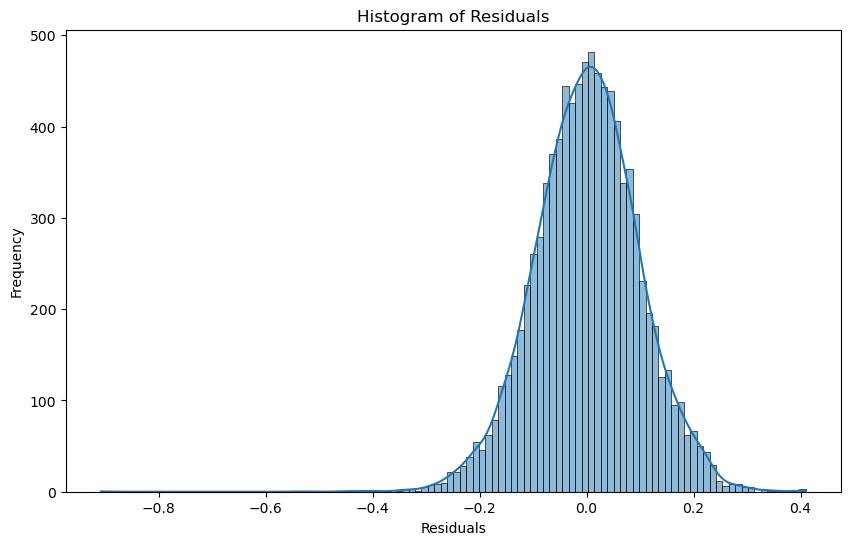

In [62]:
# Check normality of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

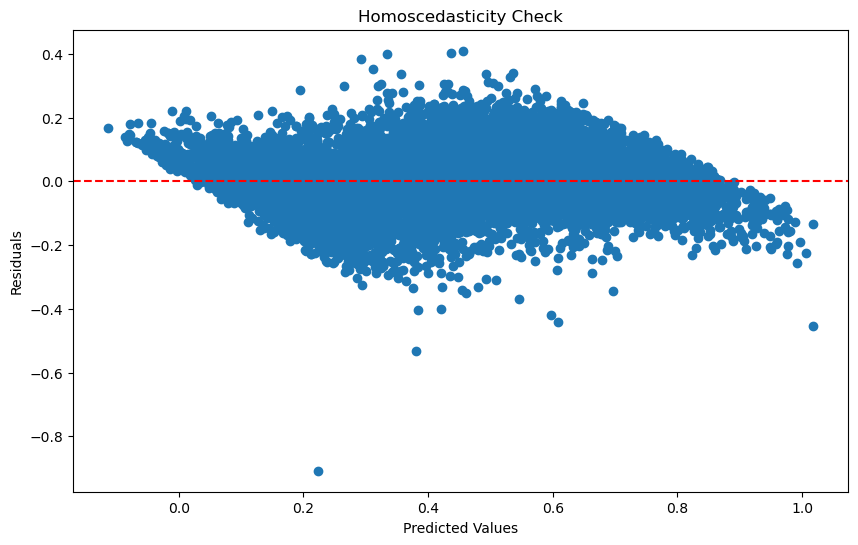

In [63]:
# Check homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title("Homoscedasticity Check")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Model Deployment:

First we have to look at the three components of the test data and make the dataset ready
We will have to merge the 'test_main_loan_base' with the 'test_repayment_base' dataset using the total repayment and then merge the resultant dataset with 'test_monthly_balance_base' to have our dataset ready to act as a test dataset.

In [64]:
#Looking at the test dataset
# Load test_main_loan_base.csv
test_main_loan_base_path = os.path.join(data_directory, 'test_main_loan_base.csv')
test_main_loan_base = pd.read_csv(test_main_loan_base_path)

# Load repayment_base.csv
test_repayment_base_path = os.path.join(data_directory, 'test_repayment_base.csv')
test_repayment_base = pd.read_csv(test_repayment_base_path)

# Load monthly_balance_base.csv
test_monthly_balance_base_path = os.path.join(data_directory, 'test_monthly_balance_base.csv')
test_monthly_balance_base = pd.read_csv(test_monthly_balance_base_path)

In [65]:
test_main_loan_base.head()

,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08


In [66]:
test_main_loan_base.shape

(10000, 15)

In [67]:
test_repayment_base.head()

,loan_acc_num,repayment_amount,repayment_date
0,LN14086568,111925.040000,2014-12-19
1,LN14086568,111925.040000,2015-01-26
2,LN14086568,111925.040000,2015-02-21
3,LN14086568,111925.040000,2015-03-20
4,LN14086568,11590.317813,2015-04-26


In [68]:
test_repayment_base.shape

(125860, 3)

In [69]:
test_monthly_balance_base.head()

,loan_acc_num,date,balance_amount
0,LN14086568,2006-12-13,9014.212689
1,LN14086568,2007-01-12,28129.516540
2,LN14086568,2007-02-11,10820.366663
3,LN14086568,2007-03-13,32491.477851
4,LN14086568,2007-04-12,24982.192310


In [70]:
test_monthly_balance_base.shape

(801407, 3)

In [71]:
# Calculate total prepayments for each loan account from repayment_base
test_total_prepayments_df = test_repayment_base.groupby('loan_acc_num')['repayment_amount'].sum().reset_index()
test_total_prepayments_df.rename(columns={'repayment_amount': 'total_prepayments'}, inplace=True)

# Calculate average monthly balance for each account from monthly_balance_base
test_average_balance_df = test_monthly_balance_base.groupby('loan_acc_num')['balance_amount'].mean().reset_index()
test_average_balance_df.rename(columns={'balance_amount': 'average_monthly_balance'}, inplace=True)

# Merge main_loan_base with total_prepayments_df and average_balance_df
test_merged_main_loan_base = pd.merge(test_main_loan_base, test_total_prepayments_df, on='loan_acc_num', how='left')
test_merged_main_loan_base = pd.merge(test_merged_main_loan_base, test_average_balance_df, on='loan_acc_num', how='left')

test_merged_main_loan_base.head()


,loan_acc_num,customer_name,customer_address,loan_type,loan_amount,collateral_value,cheque_bounces,number_of_loans,missed_repayments,vintage_in_months,tenure_years,interest,monthly_emi,disbursal_date,default_date,total_prepayments,average_monthly_balance
0,LN14086568,Jayesh Kar,"83/65, Deo Circle\nBhagalpur-852841",Car,1259062,10184.09,3,1,5,103,1,12.1,111925.04,2014-11-23,2015-04-30,675861.052902,26560.585984
1,LN37082418,Kaira Chhabra,17\nSule Ganj\nAizawl 491897,Consumer-Durable,21731,2313.21,0,3,26,39,5,12.2,485.59,2014-01-11,2017-03-11,2208.645810,80.712017
2,LN42963368,Anahita Bhargava,51/421\nKannan Chowk\nVaranasi-209999,Car,207660,8308.71,1,2,0,63,1,13.9,18635.42,2012-10-26,2013-06-23,111812.520000,15501.249720
3,LN54572294,Myra Samra,"22\nSubramanian Marg, Bhilai 850327",Two-Wheeler,193528,26432.24,4,3,12,15,2,12.5,9155.29,2021-10-07,2023-01-19,18310.580000,2806.721974
4,LN65792799,Arhaan Rana,"22, Kapoor Road\nJalandhar 667155",Consumer-Durable,5980,1641.66,1,1,0,152,1,14.6,538.62,2020-03-04,2020-10-08,3428.641165,673.018752


In [72]:
test_merged_main_loan_base.shape

(10000, 17)

In [73]:
test_merged_main_loan_base.isnull().sum()

loan_acc_num                 0
customer_name                0
customer_address             0
loan_type                    0
loan_amount                  0
collateral_value             0
cheque_bounces               0
number_of_loans              0
missed_repayments            0
vintage_in_months            0
tenure_years                 0
interest                     0
monthly_emi                  0
disbursal_date               0
default_date                 0
total_prepayments          768
average_monthly_balance     57
dtype: int64

there are 768 instances where we are not able to find the values for total_prepayment, as these instances are necessary for calulation of LGD so we will assume that total prepayment in this case = 0
Also the missing values of average_monthly_balance is equal to minimum average monthly balance

In [74]:
#Fill missing values in total_prepayments column with 0
test_merged_main_loan_base['total_prepayments'].fillna(0, inplace=True)

In [75]:
#Fill missing values in average_monthly_balance column with minimum average monthly balance value
min_avg_monthly_balance = test_merged_main_loan_base['average_monthly_balance'].min()
test_merged_main_loan_base['average_monthly_balance'].fillna(min_avg_monthly_balance, inplace=True)

In [76]:
test_merged_main_loan_base.isnull().sum()

loan_acc_num               0
customer_name              0
customer_address           0
loan_type                  0
loan_amount                0
collateral_value           0
cheque_bounces             0
number_of_loans            0
missed_repayments          0
vintage_in_months          0
tenure_years               0
interest                   0
monthly_emi                0
disbursal_date             0
default_date               0
total_prepayments          0
average_monthly_balance    0
dtype: int64

Equation of the Linear Regression model:
LGD = 0.0108 * cheque_bounces + 0.0387 * number_of_loans + 0.0202 * missed_repayments + -0.0016 * vintage_in_months + -0.0566 * tenure_years + 0.4723


In [80]:
# Define coefficients
coefficients = {'cheque_bounces': 0.0108,
                'number_of_loans': 0.0387,
                'missed_repayments': 0.0202,
                'vintage_in_months': -0.0016,
                'tenure_years': -0.0566,
                'intercept': 0.4723}  # Intercept term

# Calculate predicted LGD using the equation we got above
test_merged_main_loan_base['Model_based_LGD'] = (coefficients['cheque_bounces'] * test_merged_main_loan_base['cheque_bounces'] +
                                                 coefficients['number_of_loans'] * test_merged_main_loan_base['number_of_loans'] +
                                                 coefficients['missed_repayments'] * test_merged_main_loan_base['missed_repayments'] +
                                                 coefficients['vintage_in_months'] * test_merged_main_loan_base['vintage_in_months'] +
                                                 coefficients['tenure_years'] * test_merged_main_loan_base['tenure_years'] +
                                                 coefficients['intercept'])


In [81]:
test_merged_main_loan_base['Model_based_LGD'].describe()

count    10000.000000
mean         0.448383
std          0.218426
min         -0.157900
25%          0.279175
50%          0.440150
75%          0.612825
max          1.085100
Name: Model_based_LGD, dtype: float64

In [82]:
#Calculating Loss Given Default by using the formula (LGD)
test_merged_main_loan_base['Calculated LGD'] = (test_merged_main_loan_base['loan_amount'] - (test_merged_main_loan_base['collateral_value'] + test_merged_main_loan_base['total_prepayments'])) / test_merged_main_loan_base['loan_amount']

In [83]:
test_merged_main_loan_base.columns

Index(['loan_acc_num', 'customer_name', 'customer_address', 'loan_type',
       'loan_amount', 'collateral_value', 'cheque_bounces', 'number_of_loans',
       'missed_repayments', 'vintage_in_months', 'tenure_years', 'interest',
       'monthly_emi', 'disbursal_date', 'default_date', 'total_prepayments',
       'average_monthly_balance', 'Model_based_LGD', 'Calculated LGD'],
      dtype='object')

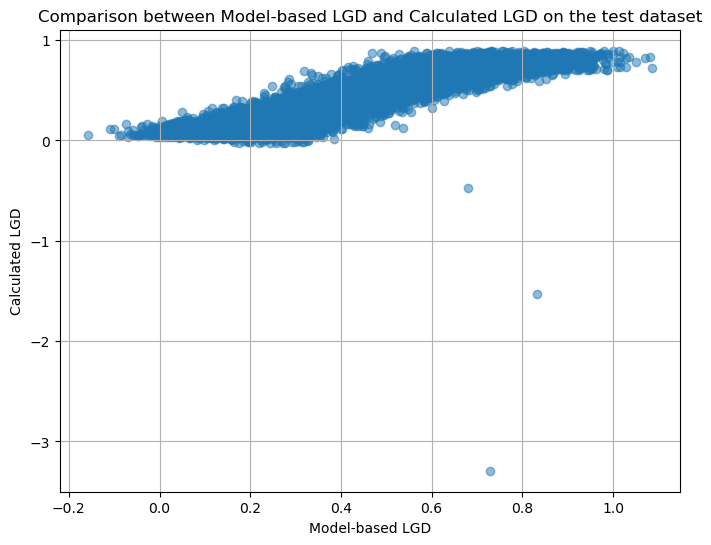

In [84]:
import matplotlib.pyplot as plt

# Scatter plot comparison
plt.figure(figsize=(8, 6))
plt.scatter(test_merged_main_loan_base['Model_based_LGD'], test_merged_main_loan_base['Calculated LGD'], alpha=0.5)
plt.title('Comparison between Model-based LGD and Calculated LGD on the test dataset')
plt.xlabel('Model-based LGD')
plt.ylabel('Calculated LGD')
plt.grid(True)
plt.show()


In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_merged_main_loan_base['Calculated LGD'], test_merged_main_loan_base['Model_based_LGD'])
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_merged_main_loan_base['Calculated LGD'], test_merged_main_loan_base['Model_based_LGD'])
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2) Score
r2 = r2_score(test_merged_main_loan_base['Calculated LGD'], test_merged_main_loan_base['Model_based_LGD'])
print("R-squared (R2) Score:", r2)

# Calculate Pearson Correlation Coefficient
pearson_corr = np.corrcoef(test_merged_main_loan_base['Calculated LGD'], test_merged_main_loan_base['Model_based_LGD'])[0, 1]
print("Pearson Correlation Coefficient:", pearson_corr)



Mean Absolute Error (MAE): 0.07944006031045403
Mean Squared Error (MSE): 0.012328095078336406
Root Mean Squared Error (RMSE): 0.11103195521261618
R-squared (R2) Score: 0.791796021173649
Pearson Correlation Coefficient: 0.8898775047190393


# Interpretation and Implications:

The model demonstrates good predictive performance with low MAE, MSE, and RMSE, indicating that the predictions are close to the actual LGD values.

The high R-squared score (approximately 0.79) suggests that the model explains a significant portion of the variance in LGD values.
A strong positive linear correlation (Pearson correlation coefficient approximately 0.8899) between predicted and calculated LGD values further validates the model's effectiveness.

The model can enhance risk management by providing accurate estimates of LGD, enabling banks to allocate appropriate reserves for potential losses.

Compliance with regulatory standards, such as Basel norms, is facilitated by the model's ability to quantify credit risk and inform decision-making processes.Successes include the model's overall predictive accuracy and its potential to improve risk management practices and regulatory compliance.Areas for improvement may include refining feature selection, exploring additional predictive variables, and conducting further validation and testing to ensure robustness.
